In [3]:
# MRC: Marginal Risk Contribution
# sigma_p: standard deviation of an asset's return

import numpy as np
import pandas as pd
from scipy.optimize import minimize

def calculate_mrc(wei_i,weights, cov_matrix):
    sigma_p = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    mrc = np.dot(wei_i*weights, np.dot(cov_matrix, weights))/ sigma_p
    return mrc

def objective_function(weights, cov_matrix):
    mrc = 0
    count_n = len(weights)
    
    for kkd_i in range(count_n):
        wei_i        = np.zeros(count_n)
        wei_i[kkd_i] = 1
        for kkd_j in range(count_n):
            wei_j        = np.zeros(count_n)
            wei_j[kkd_j] = 1
            mrc += (calculate_mrc(wei_i,weights, cov_matrix) - calculate_mrc(wei_j,weights, cov_matrix))**2
        
    return mrc

constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # 权重之和为1
               {'type': 'ineq', 'fun': lambda w: w}]             # 所有权重大于等于0

cov_matrix = (pd.DataFrame([[4.5*4.5/100,0],[0,1.62*1.62/100]])/100)

initial_weights = np.ones(len(cov_matrix)) / len(cov_matrix)

result = minimize(objective_function, initial_weights, args=(cov_matrix,), constraints=constraints)

optimized_weights = result.x
print("最优权重:")
print(optimized_weights)

最优权重:
[0.26960209 0.73039791]


In [33]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from tqdm import tqdm

def calculate_mrc(wei_i,weights, cov_matrix):
    sigma_p = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    mrc = np.dot(wei_i*weights, np.dot(cov_matrix, weights))/ sigma_p
    return mrc

cov_matrix = (pd.DataFrame([[4.5*4.5/100,0],[0,1.62*1.62/100]])/100)

list_1 = np.array(range(1000))/1000
dict_1 = dict()
dict_2 = dict()

for i in tqdm(range(0, len(list_1))):
    dict_1[i] = calculate_mrc(np.array([1,0]),np.array([list_1[i],1-list_1[i]]), cov_matrix)
    dict_2[i] = calculate_mrc(np.array([0,1]),np.array([list_1[i],1-list_1[i]]), cov_matrix)

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 22019.19it/s]


In [39]:
data_mrc=pd.DataFrame(index=list_1)
data_mrc['A'] = dict_1.values()
data_mrc['B'] = dict_2.values()
data_mrc['sum'] = data_mrc['A'] +data_mrc['B'] 

<Axes: >

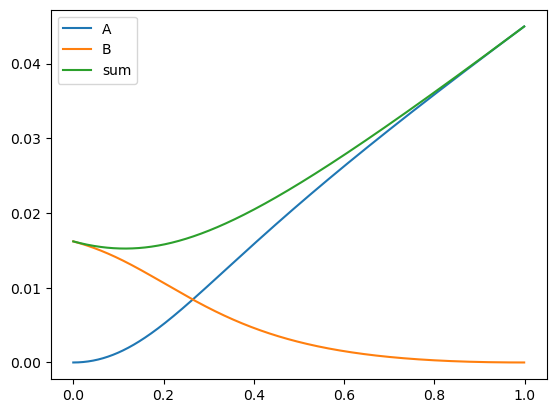

In [40]:
data_mrc.plot()

In [52]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as seaborn

def calculate_mrc(wei_i,weights, cov_matrix):
    sigma_p = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    mrc = np.dot(wei_i*weights, np.dot(cov_matrix, weights))/ sigma_p
    return mrc

# cov_matrix = (pd.DataFrame([[4.5*4.5/100,0],[0,1.62*1.62/100]])/100)
cov_matrix = (pd.DataFrame([[10,2,3],[2,19,6],[3,6,11]])/100)

list_1 = np.array(range(100))/100
list_2 = np.array(range(100))/100
dict_1 = dict()
dict_2 = dict()
dict_3 = dict()

from tqdm import tqdm 
for i in tqdm(range(0, len(list_1))):
    for j in range(0,len(list_2)):
        dict_1[(i,j)] = calculate_mrc(np.array([1,0,0]),np.array([list_1[i],list_2[j], 1-list_1[i]-list_2[j]]), cov_matrix)
        dict_2[(i,j)] = calculate_mrc(np.array([0,1,0]),np.array([list_1[i],list_2[j], 1-list_1[i]-list_2[j]]), cov_matrix)
        dict_3[(i,j)] = calculate_mrc(np.array([0,0,1]),np.array([list_1[i],list_2[j], 1-list_1[i]-list_2[j]]), cov_matrix)

data_mrc = pd.DataFrame(index = dict_1.keys())
data_mrc['A'] = dict_1.values()
data_mrc['B'] = dict_2.values()
data_mrc['C'] = dict_3.values()
data_mrc['sum'] = data_mrc['A'] + data_mrc['B'] + data_mrc['C']

# data_mrc.plot()

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 288.29it/s]


<Axes: >

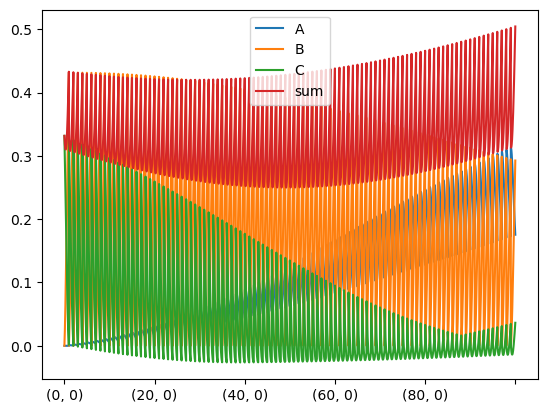

In [53]:
data_mrc.plot()

In [55]:
data_mrc.reset_index()

,level_0,level_1,A,B,C,sum
0,0,0,0.000000,0.000000,0.331662,0.331662
1,0,1,0.000000,0.001857,0.328322,0.330179
2,0,2,0.000000,0.003808,0.324935,0.328743
3,0,3,0.000000,0.005856,0.321500,0.327356
4,0,4,0.000000,0.008000,0.318019,0.326018
...,...,...,...,...,...,...
9995,99,95,0.180979,0.278292,0.031957,0.491228
9996,99,96,0.179580,0.281882,0.033043,0.494505
9997,99,97,0.178193,0.285468,0.034134,0.497796
9998,99,98,0.176820,0.289051,0.035230,0.501102


<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


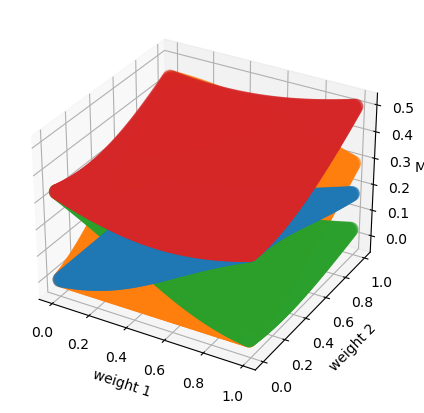

In [70]:
x1 = data_mrc.reset_index()['level_0']/100
y1 = data_mrc.reset_index()['level_1']/100
z1 = data_mrc['A']

x2 = data_mrc.reset_index()['level_0']/100
y2 = data_mrc.reset_index()['level_1']/100
z2 = data_mrc['B']

x3 = data_mrc.reset_index()['level_0']/100
y3 = data_mrc.reset_index()['level_1']/100
z3 = data_mrc['C']

x4 = data_mrc.reset_index()['level_0']/100
y4 = data_mrc.reset_index()['level_1']/100
z4 = data_mrc['sum']

axes = plt.axes(projection="3d")
print(type(axes))
axes.scatter3D(x1, y1, z1, s=100)
axes.scatter3D(x2, y2, z2, s=100)
axes.scatter3D(x3, y3, z3, s=100)
axes.scatter3D(x4, y4, z4, s=100)

axes.set_xlabel("weight 1")
axes.set_ylabel("weight 2")
axes.set_zlabel("MRC")
plt.show()

In [61]:
data_mrc

A         B         C       sum
0  0   0.000000  0.000000  0.331662  0.331662
   1   0.000000  0.001857  0.328322  0.330179
   2   0.000000  0.003808  0.324935  0.328743
   3   0.000000  0.005856  0.321500  0.327356
   4   0.000000  0.008000  0.318019  0.326018
...         ...       ...       ...       ...
99 95  0.180979  0.278292  0.031957  0.491228
   96  0.179580  0.281882  0.033043  0.494505
   97  0.178193  0.285468  0.034134  0.497796
   98  0.176820  0.289051  0.035230  0.501102
   99  0.175460  0.292630  0.036331  0.504421

[10000 rows x 4 columns]

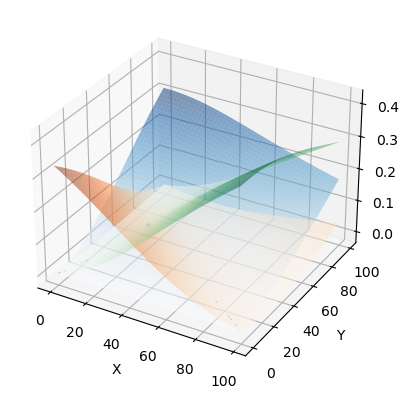

In [71]:
# data_mrc.plot()
df = data_mrc.reset_index()
df['E'] = np.nan
sign_E = np.isclose(df['A'], df['B'],0.001,0.001) | np.isclose(df['A'], df['C'],0.001,0.001)
df.loc[sign_E ,'E'] = df.loc[sign_E,'A']


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 创建三维图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 创建网格
x, y = np.meshgrid(df['level_0'].unique(), df['level_1'].unique())

# 将一维数组转换为二维数组
z_a = np.reshape(df['A'].values, (len(df['level_1'].unique()), len(df['level_0'].unique())))
z_b = np.reshape(df['B'].values, (len(df['level_1'].unique()), len(df['level_0'].unique())))
z_c = np.reshape(df['C'].values, (len(df['level_1'].unique()), len(df['level_0'].unique())))
z_E = np.reshape(df['E'].values, (len(df['level_1'].unique()), len(df['level_0'].unique())))

# # 绘制三维曲面
# surf_a = ax.plot_surface(x, y, z_a, alpha=0.7, cmap='viridis', label='A')
# surf_b = ax.plot_surface(x, y, z_b, alpha=0.7, cmap='plasma', label='B')
# surf_c = ax.plot_surface(x, y, z_c, alpha=0.7, cmap='inferno', label='C')
# surf_E = ax.plot_surface(x, y, z_E, alpha=0.7, cmap='inferno', label='E')

# 绘制三维曲面
surf_a = ax.plot_surface(x, y, z_a, alpha=0.5, cmap='Blues', label='A')
surf_b = ax.plot_surface(x, y, z_b, alpha=0.5, cmap='Greens', label='B')
surf_c = ax.plot_surface(x, y, z_c, alpha=0.5, cmap='Oranges', label='C')
surf_E = ax.plot_surface(x, y, z_E, alpha=1.0, cmap='viridis', label='E')  # 使用明显的颜色，例如viridis


# 添加颜色图例
# legend = ax.legend()

# 修复图例错误
# for lh in legend.legendHandles:
    # lh.set_alpha(1)
    
# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图形
plt.show(block=True)